In [1]:
import matplotlib.pyplot as plt
import librosa

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    fig.set_size_inches(20, 5)
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [2]:
import numpy as np
import torch
from torchinfo import summary
from librosa.feature import melspectrogram
#from librosa import load

fp_1 = '/home/kangwook/db/LibriSpeech/train-clean-100/911/128684/911-128684-0091.flac'
fp_2 = '/home/kangwook/db/LibriSpeech/train-clean-100/911/128684/911-128684-0090.flac'
fp_3 = '/home/kangwook/db/LibriSpeech/train-clean-100/911/128684/911-128684-0089.flac'
fp_4 = '/home/kangwook/db/LibriSpeech/train-clean-100/911/128684/911-128684-0088.flac'

In [3]:
from torchaudio import load

from torchaudio.transforms import MelSpectrogram

mel_transform = MelSpectrogram(sample_rate = 16000,
                               n_fft = 400,
                               n_mels = 80,
                               hop_length = 320,
                               center = False)

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [4]:
f1, sr = load(fp_1)
f2, _ = load(fp_2)
f3, _ = load(fp_3)
f4, _ = load(fp_4)

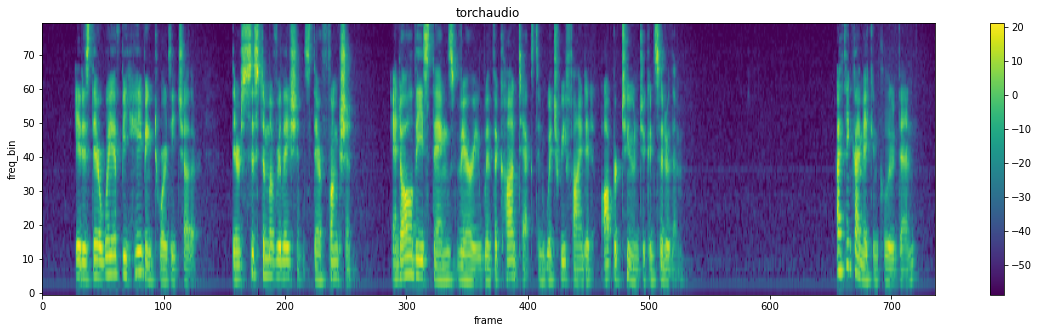

In [5]:
spec = mel_transform(f2)
plot_spectrogram(spec[0], title="torchaudio")

In [10]:
spec[0].shape

torch.Size([80, 736])

In [11]:
torch.log(spec[0])

tensor([[-11.4065, -11.7525, -11.5824,  ..., -11.7014, -11.8139, -11.6391],
        [-10.1200, -10.4660, -10.2959,  ..., -10.4149, -10.5274, -10.3526],
        [ -8.8521,  -8.4899,  -8.4520,  ...,  -8.5899,  -8.7390,  -8.3850],
        ...,
        [-13.6668, -13.6577, -13.5188,  ..., -13.2090, -13.1589, -14.2984],
        [-14.1053, -13.8578, -13.5247,  ..., -13.4625, -14.4025, -13.6634],
        [-12.9163, -14.7811, -12.7969,  ..., -13.1714, -14.5502, -13.9708]])

In [12]:
torch.log(spec[0] + 1e-6)

tensor([[-11.3204, -11.6329, -11.4805,  ..., -11.5874, -11.6872, -11.5317],
        [-10.0955, -10.4315, -10.2667,  ..., -10.3821, -10.4908, -10.3218],
        [ -8.8452,  -8.4851,  -8.4473,  ...,  -8.5845,  -8.7328,  -8.3806],
        ...,
        [-13.0452, -13.0403, -12.9630,  ..., -12.7738, -12.7411, -13.3349],
        [-13.2568, -13.1433, -12.9664,  ..., -12.9304, -13.3734, -13.0434],
        [-12.5749, -13.4929, -12.4886,  ..., -12.7493, -13.4237, -13.1970]])

In [6]:
max_len = max(f4.shape[1], f3.shape[1], f2.shape[1], f1.shape[1])

In [9]:
f1 = torch.nn.functional.pad(f1, (0, max_len - f1.shape[1]), 'constant', value = 0)
f2 = torch.nn.functional.pad(f2, (0, max_len - f2.shape[1]), 'constant', value = 0)
f3 = torch.nn.functional.pad(f3, (0, max_len - f3.shape[1]), 'constant', value = 0)
f4 = torch.nn.functional.pad(f4, (0, max_len - f4.shape[1]), 'constant', value = 0)

In [10]:
f_batch = torch.cat((f1, f2, f3, f4), dim = 0)

In [13]:
f_batch.shape

torch.Size([4, 260800])

In [16]:
batch_mel_spc = mel_transform(f_batch)
batch_mel_spc.shape

torch.Size([4, 80, 814])

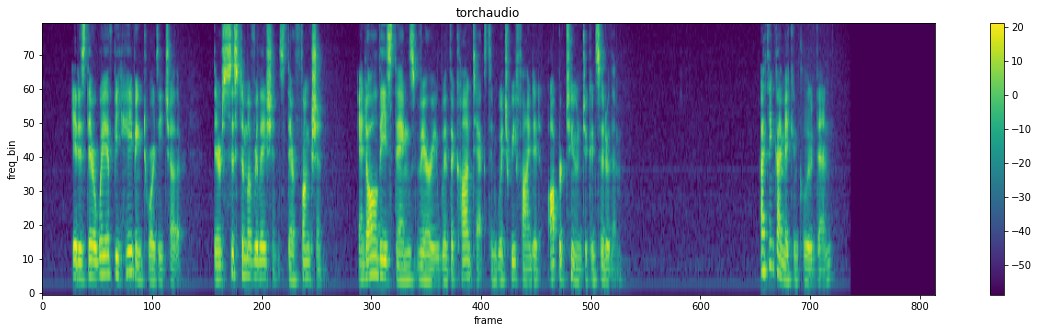

In [20]:
plot_spectrogram(batch_mel_spc[1], title="torchaudio")

In [21]:
spec[0] == batch_mel_spc[1] ## Doesn't matter if you put it whole as a batch

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [22]:
batch_y_rand = []

for batch in range(f_batch.shape[0]):

    single_mel_spc = mel_transform(f_batch[batch, ...])
    
    single_mel_spc = single_mel_spc.unsqueeze(0)
    batch_y_rand.append(single_mel_spc)
    
batch_y_rand = torch.cat(batch_y_rand, dim = 0)
batch_y_rand.shape

torch.Size([4, 80, 814])

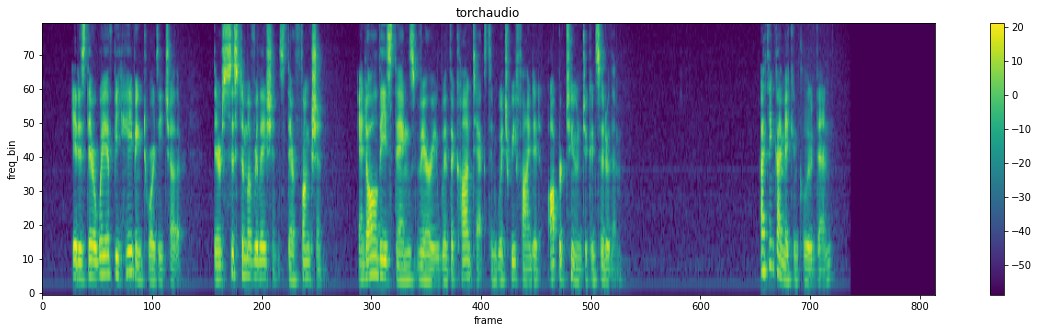

In [24]:
plot_spectrogram(batch_y_rand[1], title="torchaudio")

In [25]:
batch_y_rand[1] == spec[0]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

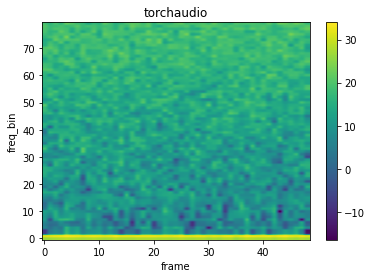

In [42]:
plot_spectrogram(mel_spc[0], title="torchaudio")

In [23]:
batch_y_rand = []

for batch in range(y_rand.shape[0]):
    single_mel_spc = melspectrogram(y = y_rand[batch, ...],
                                    sr = 16000,
                                    n_fft = 400,
                                    n_mels = 80,
                                    hop_length = 320,
                                    center = False)
    single_mel_spc = np.expand_dims(single_mel_spc, axis = 0)
    
    print (single_mel_spc.shape)
    
    batch_y_rand.append(single_mel_spc)

batch_y_rand = np.concatenate(batch_y_rand, axis = 0)
batch_y_rand = torch.from_numpy(batch_y_rand)

(1, 80, 49)
(1, 80, 49)
(1, 80, 49)
(1, 80, 49)


In [25]:
batch_y_rand.shape

torch.Size([4, 80, 49])

In [13]:
batch_y_rand = []

for batch in range(y_rand.shape[0]):
    single_mel_spc = melspectrogram(y_rand[batch, ...],
                                    sr = 16000,
                                    n_fft = 400,
                                    n_mels = 80,
                                    hop_length = 320,
                                    center = False)
    single_mel_spc = np.expand_dims(single_mel_spc, axis = 0)
    
    print (single_mel_spcel_spc.shape)
    
    batch_y_rand.append(single_mel_spc)

batch_y_rand = np.concatenate(batch_y_rand, axis = 0)
batch_y_rand = torch.from_numpy(batch_y_rand)

NameError: name 'y_rand' is not defined

In [12]:
y, sr = load(file_path, sr = 16000)
y_tn = torch.from_numpy(y).unsqueeze(0)

print (y_tn.shape)
#summary(model, y_tn.shape)

torch.Size([1, 260800])


In [5]:
from modules.model import CustomStudentModelConfig, CustomStudentModel

In [8]:
#mel_cfg = CustomStudentModelConfig(n_mels = 80)
default_cfg = CustomStudentModelConfig()
default_model = ConvFeatureExtractionModel(default_cfg)

NameError: name 'ConvFeatureExtractionModel' is not defined

In [1]:
file_path = '/home/kangwook/db/LibriSpeech/train-clean-100/911/128684/911-128684-0091.flac'
y, sr = load(file_path, sr = 16000)

In [2]:

y_tn = torch.from_numpy(y).unsqueeze(0)

In [ ]:

mel_spc = melspectrogram(y, sr, n_fft = 400, n_mels = 80, hop_length = 320)

In [ ]:
mel_spc.shape

In [ ]:
batch_y_rand

In [ ]:
y_tn_rand = torch.from_numpy(y_rand)
summary(model, y_tn_rand.shape)